In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Description :
Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

| Variable | Description| Units |
| :------- | :------: | :------: |
| age | Age | 
| workclass | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. | 
| fnlwgt |  |
| education | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.|
| education-num |  |
| marital-status | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. |
| occupation | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. |
| relationship | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried |
| race | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. |
| sex | Female, Male. |
| capital-gain |  |
| capital-loss |  |
| hours-per-week |  |
| native-country | 	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |
| income | >50K, <=50K |
#### Target Variable:
Target Variable: income

In [165]:
data = pd.read_csv('adult_census.csv')
pd.set_option('display.max_columns', None)

In [166]:
data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [168]:
pd.isnull(data).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [169]:
data.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num   32561.0      10.080679       2.572720      1.0       9.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education-num       10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0

In [170]:
categorical_cols = data.select_dtypes(include=['category', object])

In [171]:
categorical_cols.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [172]:
data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [173]:
data.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [174]:
data["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [175]:
data.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [176]:
data.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [177]:
data.sex.unique()

array([' Male', ' Female'], dtype=object)

In [178]:
data["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [179]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [180]:
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [181]:
data.replace('?', np.nan, inplace=True)

In [182]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [183]:
data["workclass"] = data["workclass"].fillna(data["workclass"].mode()[0])

In [184]:
data["occupation"] = data["occupation"].fillna(data["occupation"].mode()[0])

In [185]:
data["native-country"] = data["native-country"].fillna(data["native-country"].mode()[0])

In [186]:
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [187]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[['workclass','education','marital-status','occupation','relationship', 'race', 'sex', 'native-country', 'income']]=oe.fit_transform(data[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']])

In [218]:
data.head(5)

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39        6.0   77516        9.0             13             4.0   
1   50        5.0   83311        9.0             13             2.0   
2   38        3.0  215646       11.0              9             0.0   
3   53        3.0  234721        1.0              7             2.0   
4   28        3.0  338409        9.0             13             2.0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0         0.0           1.0   4.0  1.0          2174             0   
1         3.0           0.0   4.0  1.0             0             0   
2         5.0           1.0   4.0  1.0             0             0   
3         5.0           0.0   2.0  1.0             0             0   
4         9.0           5.0   2.0  0.0             0             0   

   hours-per-week  native-country  income  
0              40            38.0     0.0  
1              13            38.0     0.0  
2              40            38.0     0.0  
3              40            38.0     0.0  
4              40             4.0     0.0

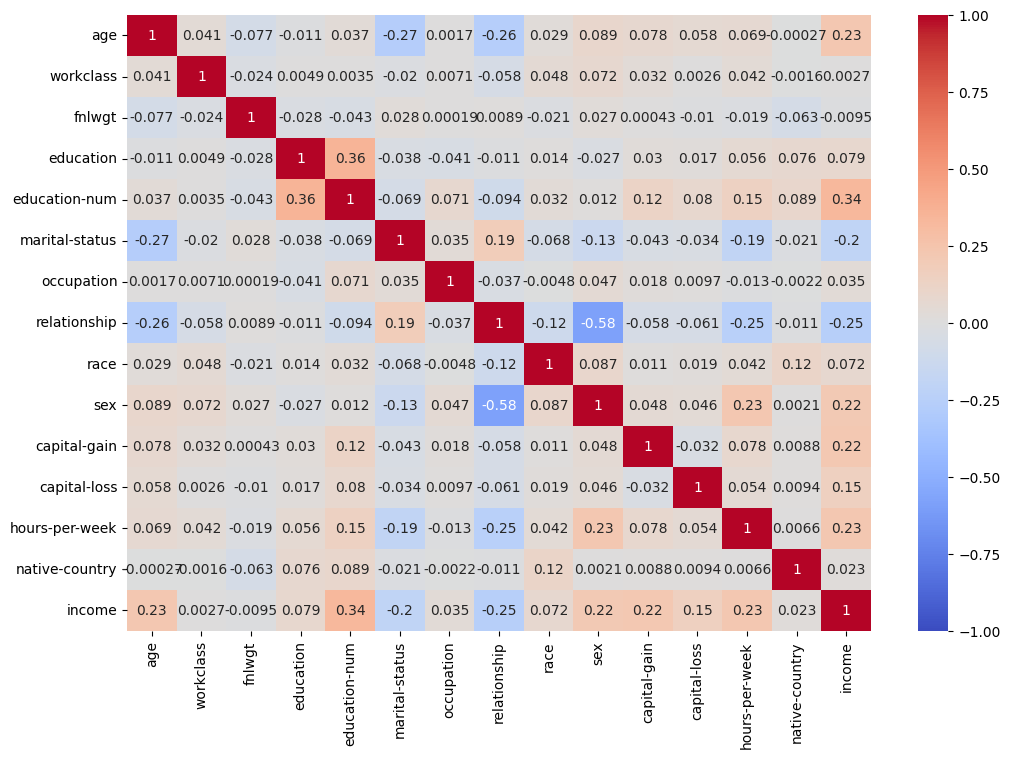

In [189]:
plt.figure(figsize=(12, 8))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [214]:
from sklearn.model_selection import train_test_split, StratifiedKFold #stratified k fold is used for Out-of-fold type stacking
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
from sklearn.preprocessing import StandardScaler

In [191]:
# Base models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [192]:
# Boosting
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [193]:
# independent and dependent features
X = data.drop(columns=["income"])
y = data["income"]

In [194]:
#for stacking providing complete data as input for train and test splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [220]:
X_train.shape #32561

(19536, 14)

In [222]:
X_test.shape

(6513, 14)

In [200]:
#Define Base Models
base_models = {
    "lr": LogisticRegression(max_iter=2000),
    "knn": KNeighborsClassifier(n_neighbors=7),
    "svm": SVC(probability=True),
    "nb": GaussianNB(),
    "dt": DecisionTreeClassifier(max_depth=5),
    "rf": RandomForestClassifier(n_estimators=200, random_state=42),
    "xgb": XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.05,
        eval_metric="logloss",
        random_state=42
    ),
    "lgbm": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42
    )
}

In [196]:
#Train base models and collect predictions
train_meta_features = []
test_meta_features = []

for model in base_models.values():
    model.fit(X_train, y_train)
    
    train_meta_features.append(model.predict_proba(X_train)[:, 1])
    test_meta_features.append(model.predict_proba(X_test)[:, 1])

X_meta_train = np.column_stack(train_meta_features) #2d array
X_meta_test = np.column_stack(test_meta_features)

C:\Users\hp\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 5881, number of negative: 18539
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 24420, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240827 -> initscore=-1.148150
[LightGBM] [Info] Start training from score -1.148150


In [229]:
X_meta_train.shape

(24420, 8)

In [231]:
X_meta_train

array([[0.07781812, 0.        , 0.20188713, ..., 0.        , 0.01412301,
        0.01024651],
       [0.37241973, 0.        , 0.20213706, ..., 0.125     , 0.43800968,
        0.45333681],
       [0.13712322, 0.        , 0.202049  , ..., 0.        , 0.00485835,
        0.01431266],
       ...,
       [0.33792403, 0.        , 0.20211317, ..., 0.11      , 0.4642086 ,
        0.4914841 ],
       [0.51253643, 0.        , 0.20192924, ..., 0.15      , 0.52773315,
        0.51739983],
       [0.14989553, 0.57142857, 0.20190556, ..., 0.        , 0.00787051,
        0.00128554]], shape=(24420, 8))

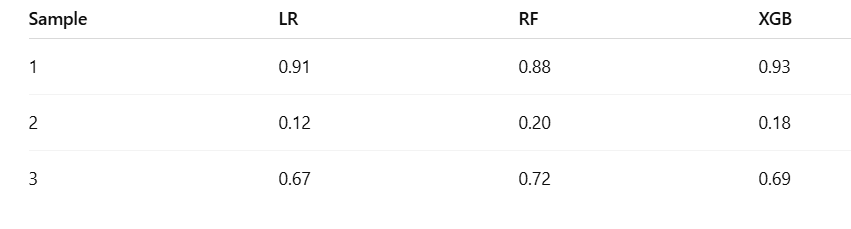

In [197]:
#Meta Model
meta_model = LogisticRegression() #considered logistic regression as meta model
meta_model.fit(X_meta_train, y_train)

y_pred = meta_model.predict(X_meta_test)
print("Simple Stacking Accuracy:", accuracy_score(y_test, y_pred))

Simple Stacking Accuracy: 0.8551774966220366


In [201]:
print("Individual Model Accuracies:\n")
for name, model in base_models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{name.upper():<5} → Accuracy: {acc:.4f}")

Individual Model Accuracies:



C:\Users\hp\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR    → Accuracy: 0.8118
KNN   → Accuracy: 0.7870
SVM   → Accuracy: 0.7939
NB    → Accuracy: 0.7976
DT    → Accuracy: 0.8485
RF    → Accuracy: 0.8607
XGB   → Accuracy: 0.8727
[LightGBM] [Info] Number of positive: 5881, number of negative: 18539
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 24420, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240827 -> initscore=-1.148150
[LightGBM] [Info] Start training from score -1.148150
LGBM  → Accuracy: 0.8742


In [202]:
"""Blending"""
# 60% Train | 20% Blend | 20% Test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
#Blending needs a separate hold-out set
X_blend, X_test, y_blend, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

In [223]:
X_train.shape #original shape-32561 #60% of train data 19536/32561

(19536, 14)

In [224]:
X_test.shape #20% of test data 6513/32561

(6513, 14)

In [225]:
X_temp.shape #40% of total data 13025/32561

(13025, 14)

In [226]:
X_blend.shape #20% of train data 6512/32561

(6512, 14)

In [207]:
#only for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_blend_scaled = scaler.transform(X_blend)
X_test_scaled = scaler.transform(X_test)

In [208]:
#Train Base Models (ONLY on Train Set)
models = {
    "lr": LogisticRegression(max_iter=1000),
    "rf": RandomForestClassifier(n_estimators=300, random_state=42),
    "xgb": XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        eval_metric="logloss",
        random_state=42
    ),
    "lgbm": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    )
}

models["lr"].fit(X_train_scaled, y_train)
models["rf"].fit(X_train, y_train)
models["xgb"].fit(X_train, y_train)
models["lgbm"].fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4704, number of negative: 14832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 19536, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240786 -> initscore=-1.148374
[LightGBM] [Info] Start training from score -1.148374


LGBMClassifier(learning_rate=0.05, n_estimators=300, random_state=42)

In [209]:
#Get BLEND Set Probabilities
blend_preds = pd.DataFrame()

blend_preds["lr"] = models["lr"].predict_proba(X_blend_scaled)[:, 1]
blend_preds["rf"] = models["rf"].predict_proba(X_blend)[:, 1]
blend_preds["xgb"] = models["xgb"].predict_proba(X_blend)[:, 1]
blend_preds["lgbm"] = models["lgbm"].predict_proba(X_blend)[:, 1]

blend_preds["true_label"] = y_blend.values
blend_preds.head()
#These ‘probabilities’ become features for the blender

lr        rf       xgb      lgbm  true_label
0  0.444310  0.640000  0.623815  0.678299         0.0
1  0.065104  0.056667  0.001737  0.002688         0.0
2  0.098409  0.146667  0.135913  0.103072         0.0
3  0.616266  0.926667  0.824613  0.872136         1.0
4  0.015877  0.000000  0.003134  0.001958         0.0

In [219]:
blend_preds.shape

(6512, 5)

In [227]:
#Train Blending Meta-Model
blend_meta = LogisticRegression()
blend_meta.fit(
    blend_preds.drop("true_label", axis=1),
    y_blend
)

LogisticRegression()

In [217]:
#Final Prediction on TEST Set
test_preds = pd.DataFrame()

test_preds["lr"] = models["lr"].predict_proba(X_test_scaled)[:, 1]
test_preds["rf"] = models["rf"].predict_proba(X_test)[:, 1]
test_preds["xgb"] = models["xgb"].predict_proba(X_test)[:, 1]
test_preds["lgbm"] = models["lgbm"].predict_proba(X_test)[:, 1]

final_probs = blend_meta.predict_proba(test_preds)[:, 1]
final_pred = (final_probs >= 0.5).astype(int)
final_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(6513,))

In [235]:
#Evaluation (FINAL MODEL)
print("Accuracy:\n", accuracy_score(y_test, final_pred))
print("----------------------------------------------------------------------------------\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred))
print("----------------------------------------------------------------------------------\n")
print("\nClassification Report:\n", classification_report(y_test, final_pred))
print("----------------------------------------------------------------------------------\n")
print("ROC-AUC:", roc_auc_score(y_test, final_probs))

Accuracy:
 0.8756333486872409
----------------------------------------------------------------------------------

Confusion Matrix:
 [[4673  271]
 [ 539 1030]]
----------------------------------------------------------------------------------


Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      4944
         1.0       0.79      0.66      0.72      1569

    accuracy                           0.88      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.88      0.87      6513

----------------------------------------------------------------------------------

ROC-AUC: 0.9267306902960062


In [236]:
#OOF Stacking
from sklearn.model_selection import StratifiedKFold

In [239]:
#Initialize OOF Matrices
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

oof_train = np.zeros((X_train.shape[0], len(base_models)))
#X_train.shape = (4000, 20)
#X_train.shape[0] = 4000
#len(base_models) = 8
oof_test = np.zeros((X_test.shape[0], len(base_models))) #np.zeros((rows, columns)), filling with zeros

In [248]:
oof_train

array([[1.06763037e-01, 5.71428571e-01, 2.01332883e-01, ...,
        0.00000000e+00, 1.69424415e-02, 1.45356090e-02],
       [3.96124346e-02, 1.42857143e-01, 2.02140471e-01, ...,
        0.00000000e+00, 6.47563022e-04, 3.81007320e-04],
       [4.35040325e-01, 1.42857143e-01, 2.01807713e-01, ...,
        5.50000000e-02, 6.02463968e-02, 5.58668716e-02],
       ...,
       [3.30037520e-01, 1.42857143e-01, 2.02196096e-01, ...,
        2.20000000e-01, 3.15281957e-01, 4.07567087e-01],
       [4.78654490e-01, 0.00000000e+00, 2.01076861e-01, ...,
        5.15000000e-01, 5.08309901e-01, 5.61912485e-01],
       [1.33827088e-01, 7.14285714e-01, 2.01519946e-01, ...,
        2.00000000e-02, 7.53677636e-03, 2.14863545e-03]], shape=(19536, 8))

In [249]:
oof_test

array([[5.25559153e-02, 1.14285714e-01, 2.01524644e-01, ...,
        1.30000000e-01, 8.79311539e-02, 8.21447130e-02],
       [2.52736722e-01, 3.42857143e-01, 2.01288159e-01, ...,
        3.91000000e-01, 3.55269498e-01, 3.81783209e-01],
       [1.55321990e-01, 2.57142857e-01, 2.01500516e-01, ...,
        4.61000000e-01, 4.64329958e-01, 5.47749530e-01],
       ...,
       [1.21088739e-01, 3.71428571e-01, 2.04577395e-01, ...,
        7.72000000e-01, 9.30617595e-01, 9.52828908e-01],
       [1.10394614e-01, 4.57142857e-01, 2.03622323e-01, ...,
        0.00000000e+00, 5.03990467e-04, 5.25328125e-04],
       [1.09683758e-01, 1.14285714e-01, 2.01591155e-01, ...,
        5.10000000e-02, 7.01406248e-02, 5.43842526e-02]], shape=(6513, 8))

In [241]:
for idx, (name, model) in enumerate(base_models.items()):
    
    oof_test_fold = np.zeros((n_folds, X_test.shape[0]))
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        
        X_tr  = X_train.iloc[train_idx]
        X_val = X_train.iloc[val_idx]
        
        y_tr  = y_train.iloc[train_idx]
        
        model.fit(X_tr, y_tr)
        
        oof_train[val_idx, idx] = model.predict_proba(X_val)[:, 1]
        oof_test_fold[fold, :] = model.predict_proba(X_test)[:, 1]
    
    oof_test[:, idx] = oof_test_fold.mean(axis=0)

C:\Users\hp\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

[LightGBM] [Info] Number of positive: 3763, number of negative: 11865
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 15628, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240786 -> initscore=-1.148376
[LightGBM] [Info] Start training from score -1.148376
[LightGBM] [Info] Number of positive: 3764, number of negative: 11865
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 15629, number of used features: 14
[LightGBM] [Info] [bin

In [255]:
name

'lgbm'

In [256]:
model

LGBMClassifier(learning_rate=0.05, n_estimators=200, random_state=42)

In [257]:
oof_test_fold #5 folds are happening on 6513 rows of data

array([[1.03976890e-01, 3.43008109e-01, 5.52780923e-01, ...,
        9.76553270e-01, 5.08690783e-04, 4.76062716e-02],
       [6.45918608e-02, 3.72436747e-01, 4.47053577e-01, ...,
        9.21889213e-01, 4.35379692e-04, 6.74006398e-02],
       [6.66291059e-02, 4.07233703e-01, 6.19559395e-01, ...,
        9.45776390e-01, 7.53528259e-04, 7.25381510e-02],
       [1.45245460e-01, 4.30622330e-01, 5.99279800e-01, ...,
        9.57702205e-01, 4.63514306e-04, 3.90614835e-02],
       [3.02802481e-02, 3.55615158e-01, 5.20073954e-01, ...,
        9.62223464e-01, 4.65527587e-04, 4.53147168e-02]], shape=(5, 6513))

In [252]:
train_idx

array([    0,     1,     2, ..., 19533, 19534, 19535], shape=(15629,))

In [253]:
val_idx

array([    3,     4,    16, ..., 19521, 19528, 19532], shape=(3907,))

In [254]:
idx

7

In [250]:
X_tr

age  workclass  fnlwgt  education  education-num  marital-status  \
7055    50        3.0  133963       11.0              9             0.0   
22185   17        3.0  146329        2.0              8             4.0   
21574   31        3.0   80511        7.0             12             0.0   
15622   54        3.0   28683       11.0              9             2.0   
10258   35        4.0  202027       15.0             10             0.0   
...    ...        ...     ...        ...            ...             ...   
13832   53        3.0  149217       11.0              9             2.0   
21681   34        3.0  209101        9.0             13             2.0   
23650   55        3.0   82098       11.0              9             2.0   
25301   26        3.0   50053        9.0             13             2.0   
5800    19        3.0  415354        0.0              6             0.0   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
7055          0.0           4.0   4.0  0.0             0             0   
22185        11.0           3.0   4.0  0.0             0             0   
21574        12.0           1.0   4.0  0.0             0             0   
15622        11.0           0.0   4.0  1.0          3464             0   
10258         3.0           1.0   4.0  1.0             0             0   
...           ...           ...   ...  ...           ...           ...   
13832         2.0           0.0   4.0  1.0             0             0   
21681         3.0           0.0   4.0  1.0          5178             0   
23650         3.0           0.0   1.0  1.0             0             0   
25301         3.0           0.0   4.0  1.0             0             0   
5800          7.0           1.0   4.0  0.0             0             0   

       hours-per-week  native-country  
7055               35            38.0  
22185              23            38.0  
21574              44            38.0  
15622              40            38.0  
10258              60            38.0  
...               ...             ...  
13832              40            32.0  
21681              55            38.0  
23650              55            38.0  
25301              55            38.0  
5800               40            38.0  

[15629 rows x 14 columns]

In [251]:
y_tr

7055     0.0
22185    0.0
21574    0.0
15622    0.0
10258    0.0
        ... 
13832    0.0
21681    1.0
23650    0.0
25301    0.0
5800     0.0
Name: income, Length: 15629, dtype: float64

In [243]:
X_val

age  workclass  fnlwgt  education  education-num  marital-status  \
14531   46        3.0  138370        5.0              4             2.0   
16272   63        3.0  172740       15.0             10             2.0   
24456   54        5.0  200960        9.0             13             2.0   
2555    25        3.0   63062       15.0             10             4.0   
9761    37        1.0  218490       11.0              9             2.0   
...    ...        ...     ...        ...            ...             ...   
21861   45        3.0  260953       12.0             14             2.0   
24070   33        3.0  192286       15.0             10             0.0   
23514   33        3.0  268127       11.0              9             4.0   
12792   57        3.0  231232        5.0              4             2.0   
20560   39        3.0  421633       15.0             10             0.0   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
14531         7.0           0.0   1.0  1.0             0          1651   
16272         9.0           0.0   4.0  1.0             0             0   
24456        11.0           0.0   4.0  1.0             0             0   
2555          4.0           3.0   4.0  1.0             0             0   
9761         10.0           0.0   4.0  1.0          7688             0   
...           ...           ...   ...  ...           ...           ...   
21861         9.0           0.0   4.0  1.0             0             0   
24070         0.0           1.0   1.0  0.0             0             0   
23514         7.0           4.0   2.0  0.0             0             0   
12792         2.0           0.0   4.0  1.0             0             0   
20560        10.0           4.0   2.0  0.0             0             0   

       hours-per-week  native-country  
14531              40             2.0  
16272              40            38.0  
24456              50            38.0  
2555               60            38.0  
9761               35            38.0  
...               ...             ...  
21861              40            38.0  
24070              52            38.0  
23514              40            38.0  
12792              40            38.0  
20560              30            38.0  

[3907 rows x 14 columns]

In [261]:
oof_train #it contains all models probabilities for training data

array([[1.06763037e-01, 5.71428571e-01, 2.01332883e-01, ...,
        0.00000000e+00, 1.69424415e-02, 1.45356090e-02],
       [3.96124346e-02, 1.42857143e-01, 2.02140471e-01, ...,
        0.00000000e+00, 6.47563022e-04, 3.81007320e-04],
       [4.35040325e-01, 1.42857143e-01, 2.01807713e-01, ...,
        5.50000000e-02, 6.02463968e-02, 5.58668716e-02],
       ...,
       [3.30037520e-01, 1.42857143e-01, 2.02196096e-01, ...,
        2.20000000e-01, 3.15281957e-01, 4.07567087e-01],
       [4.78654490e-01, 0.00000000e+00, 2.01076861e-01, ...,
        5.15000000e-01, 5.08309901e-01, 5.61912485e-01],
       [1.33827088e-01, 7.14285714e-01, 2.01519946e-01, ...,
        2.00000000e-02, 7.53677636e-03, 2.14863545e-03]], shape=(19536, 8))

In [262]:
oof_test # it contains all models probabilties for test data

array([[5.25559153e-02, 1.14285714e-01, 2.01524644e-01, ...,
        1.30000000e-01, 8.79311539e-02, 8.21447130e-02],
       [2.52736722e-01, 3.42857143e-01, 2.01288159e-01, ...,
        3.91000000e-01, 3.55269498e-01, 3.81783209e-01],
       [1.55321990e-01, 2.57142857e-01, 2.01500516e-01, ...,
        4.61000000e-01, 4.64329958e-01, 5.47749530e-01],
       ...,
       [1.21088739e-01, 3.71428571e-01, 2.04577395e-01, ...,
        7.72000000e-01, 9.30617595e-01, 9.52828908e-01],
       [1.10394614e-01, 4.57142857e-01, 2.03622323e-01, ...,
        0.00000000e+00, 5.03990467e-04, 5.25328125e-04],
       [1.09683758e-01, 1.14285714e-01, 2.01591155e-01, ...,
        5.10000000e-02, 7.01406248e-02, 5.43842526e-02]], shape=(6513, 8))

In [244]:
#Train Meta-Model
meta_model = LogisticRegression()
meta_model.fit(oof_train, y_train)

LogisticRegression()

In [245]:
#Final Evaluation
y_pred = meta_model.predict(oof_test)
acc = accuracy_score(y_test, y_pred)

print("OOF Stacking Accuracy:", acc)

OOF Stacking Accuracy: 0.8754798096115461


In [247]:
#get indivisual base model accuracies
for i, name in enumerate(base_models.keys()):
    acc = accuracy_score(y_train, (oof_train[:, i] >= 0.5).astype(int))
    print(f"{name.upper()} OOF Accuracy: {acc:.4f}")

LR OOF Accuracy: 0.8093
KNN OOF Accuracy: 0.7840
SVM OOF Accuracy: 0.7977
NB OOF Accuracy: 0.7956
DT OOF Accuracy: 0.8481
RF OOF Accuracy: 0.8538
XGB OOF Accuracy: 0.8696
LGBM OOF Accuracy: 0.8697
